In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Datasets loaded successfully.
Train data shape: (25192, 42)
Test data shape: (22544, 41)

Data preprocessing steps defined.

--- Training Logistic Regression Model ---
Logistic Regression Accuracy on Validation Set: 97.02%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

     anomaly       0.97      0.96      0.97      2349
      normal       0.97      0.98      0.97      2690

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



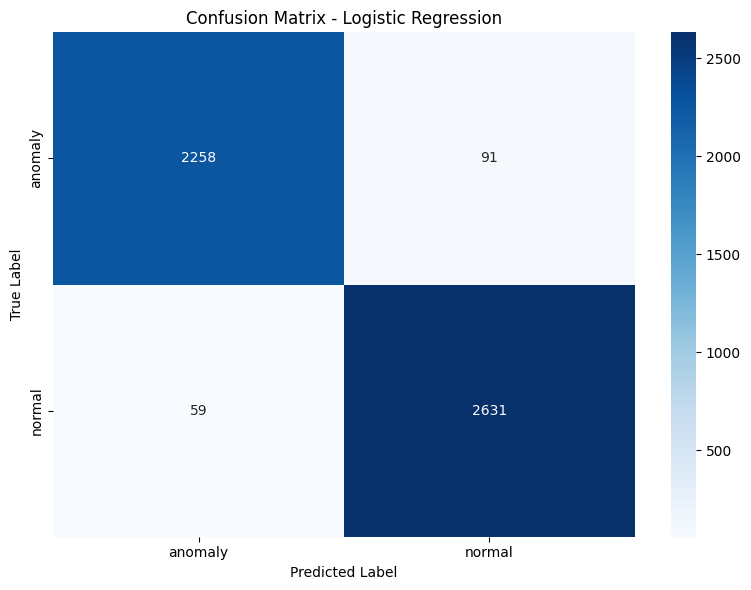


--- Training Random Forest Classifier Model (for comparison) ---
Random Forest Accuracy on Validation Set: 99.76%

Random Forest Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2349
      normal       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



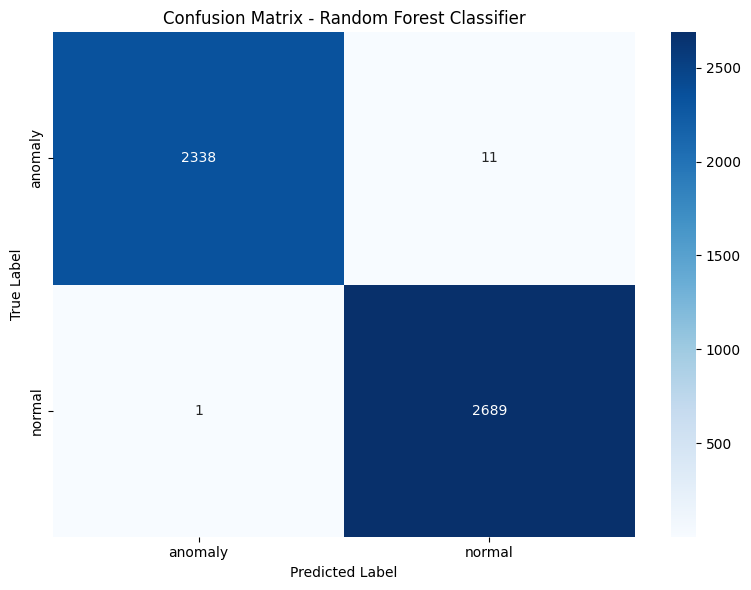


--- Model Comparison Summary ---
Logistic Regression Accuracy: 97.02%
Random Forest Classifier Accuracy: 99.76%

Making predictions on the original Test Data (Test_dat.csv) using Random Forest...
Predictions on Test Data complete. Here are the first 10 predictions:
['anomaly' 'anomaly' 'normal' 'anomaly' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal']


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # Import Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv('Train_dat.csv')
test_df = pd.read_csv('Test_dat.csv')

print("Datasets loaded successfully.")
print(f"Train data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}\n")

# Data Preprocessing
# Drop 'num_outbound_cmds' column as it has zero variance
if 'num_outbound_cmds' in train_df.columns:
    train_df = train_df.drop('num_outbound_cmds', axis=1)
if 'num_outbound_cmds' in test_df.columns:
    test_df = test_df.drop('num_outbound_cmds', axis=1)

# Separate features (X) and target (y) from training data
X = train_df.drop('class', axis=1)
y = train_df['class']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessor for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

print("Data preprocessing steps defined.")

# Split training data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression Model ---")
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))
])

logistic_pipeline.fit(X_train, y_train)
y_pred_lr = logistic_pipeline.predict(X_val)

accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f'Logistic Regression Accuracy on Validation Set: {accuracy_lr:.2%}')
print('\nLogistic Regression Classification Report:\n', classification_report(y_val, y_pred_lr))

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_val, y_pred_lr, labels=logistic_pipeline.classes_)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=logistic_pipeline.classes_, yticklabels=logistic_pipeline.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# --- Model 2: Random Forest Classifier (for comparison) ---
print("\n--- Training Random Forest Classifier Model (for comparison) ---")
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

random_forest_pipeline.fit(X_train, y_train)
y_pred_rf = random_forest_pipeline.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Random Forest Accuracy on Validation Set: {accuracy_rf:.2%}')
print('\nRandom Forest Classification Report:\n', classification_report(y_val, y_pred_rf))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_val, y_pred_rf, labels=random_forest_pipeline.classes_)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=random_forest_pipeline.classes_, yticklabels=random_forest_pipeline.classes_)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# --- Comparison Summary ---
print("\n--- Model Comparison Summary ---")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2%}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2%}")

# Predictions on the original Test Data using Random Forest (as it performed better)
print("\nMaking predictions on the original Test Data (Test_dat.csv) using Random Forest...")
test_predictions_rf = random_forest_pipeline.predict(test_df)
print("Predictions on Test Data complete. Here are the first 10 predictions:")
print(test_predictions_rf[:10])